# Project notebook for applied_statistics

This notebook is designed to analyse the PlantGrowth dataset and perform statistical analysis on it using t-test and ANOVA methods.
The dataset was downloaded from https://github.com/vincentarelbundock/Rdatasets/blob/master/csv/datasets/PlantGrowth.csv and contains results of an experiment to compare the weights of plants under three different conditions.


In [1]:
# Import any required modules

# Data Frames
import pandas as pd

# Numerical Arrays
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Statistical plotting
import seaborn as sns

# Statistics
import scipy.stats as stats

In [2]:
# Import the data into a dataframe 

df = pd.read_csv('data/plantgrowth.csv')

# Quick look at the data
df.head()

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


Describe the data

In [3]:
df.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


In [4]:
df.shape

(30, 3)

In [5]:
df.info

<bound method DataFrame.info of     rownames  weight group
0          1    4.17  ctrl
1          2    5.58  ctrl
2          3    5.18  ctrl
3          4    6.11  ctrl
4          5    4.50  ctrl
5          6    4.61  ctrl
6          7    5.17  ctrl
7          8    4.53  ctrl
8          9    5.33  ctrl
9         10    5.14  ctrl
10        11    4.81  trt1
11        12    4.17  trt1
12        13    4.41  trt1
13        14    3.59  trt1
14        15    5.87  trt1
15        16    3.83  trt1
16        17    6.03  trt1
17        18    4.89  trt1
18        19    4.32  trt1
19        20    4.69  trt1
20        21    6.31  trt2
21        22    5.12  trt2
22        23    5.54  trt2
23        24    5.50  trt2
24        25    5.37  trt2
25        26    5.29  trt2
26        27    4.92  trt2
27        28    6.15  trt2
28        29    5.80  trt2
29        30    5.26  trt2>

In [6]:
# Show the unique groups/classes
unique_class = df.group.unique()
unique_class

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [7]:
# Split the data into three variables for ease of analysis and plotting
group_ctrl=df.loc[df["group"]=="ctrl"]
group_trt1=df.loc[df["group"]=="trt1"]
group_trt2=df.loc[df["group"]=="trt2"]

# Print the number of rows in each group to confirm they are equal
print (f"ctrl: {len(group_ctrl)}\t trt1: {len(group_trt1)} \t trt2: {len(group_trt2)}")

ctrl: 10	 trt1: 10 	 trt2: 10


In [8]:
# Cycle through the three groups and print summary stats for each one
grp=0
while grp < 3:
     data = df.loc[df["group"]==unique_class[grp]]
     data = data.describe().weight[['min', 'max', 'mean', 'std']]
     print(f"Group: \t{unique_class[grp]}, \n{data}\n")
     grp=grp+1

Group: 	ctrl, 
min     4.170000
max     6.110000
mean    5.032000
std     0.583091
Name: weight, dtype: float64

Group: 	trt1, 
min     3.590000
max     6.030000
mean    4.661000
std     0.793676
Name: weight, dtype: float64

Group: 	trt2, 
min     4.920000
max     6.310000
mean    5.526000
std     0.442573
Name: weight, dtype: float64



## $t$ Test ##

A $t$ Test (or t distribution test) is a statistical test used to compare the means of two groups. Starting with an assumption that the two populations are the same and that there is no difference between them, the results of the t test will either prove of disprove the null hypothesis.   
The test was developed by W.S.Gosset an employee of the Guiness brewery in Dublin and as he was not allowed to publish it under his own name he used the pseudonym "Student" which gives the test it's name. (https://www.qualtrics.com/en-gb/experience-management/research/t-test/)   

There are two main flavours of the t Test:      
- Independent Samples t Test   
- Dependent/Paired Samples t Test   

Dependent/Paired Sample t Test - works by comparing the means between two related groups on the same continuous dependent variable.   
Independent Sample t Test - works by comparing the means of two unrelated groups on the same continuous dependent variable.    

The output of a t test is...

### Assumptions
The following assumptions should be checked and verified to confirm that the data are suitable to be used within a t-test.Taken from laerd.com (https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php)
- The dependent variable should be measured on a continuous scale.
- The independent variable should consist of two categorical, independent groups. 
- There should be no relationship between the observations in each group.   
- There should be no significant outliers.   
- The dependent variable should be approximately normally distributed for each group of observations.   
- There needs to be homogeneity of variances - Levene’s test!

We will test these assumptions below:

Assumption 1, 2, 3 - The dependent variable is weight which is a continuous variable. We have two categorical, independent groups - trt1 and trt2. Both trt1 and trt2 are independent groups with no relationship between the observations in each group.

Assumption 4 - Next, using a box plot we can check for the existance any significant outliers.   

Although we do see two points that look like outliers for group = trt1 we have no reason to believe that these are errors such as measurement/data entry errors so are potentially true extreme values. Although they could have some impact on our results we have no reason to exclude them from our analysis at this point.

In [9]:
# Convert the data to dataframe for plotting

data = pd.concat([
    pd.DataFrame({"weight": group_trt1["weight"], "group": "trt1"}),
    pd.DataFrame({"weight": group_trt2["weight"], "group": "trt2"})
])

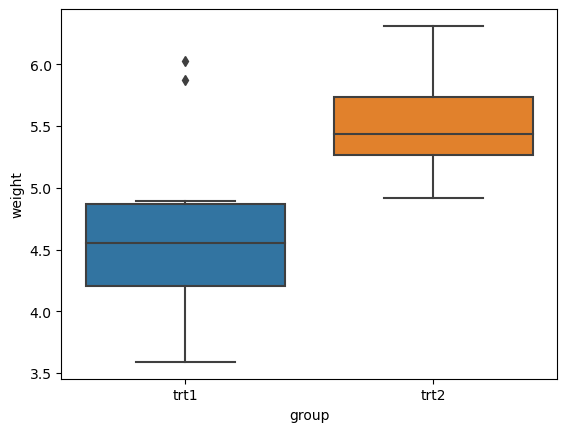

In [10]:
# Plot a boxchart
# https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn-boxplot

sns.boxplot(data=data, x="group", y="weight");

Assumption 5 - Using histograms we can validate if the data is normally distributed. Even though our sample size is small the histograms below show that the data pretty much follows a bell curve and has no extreme outliers so we can say it is normally distributed also. 

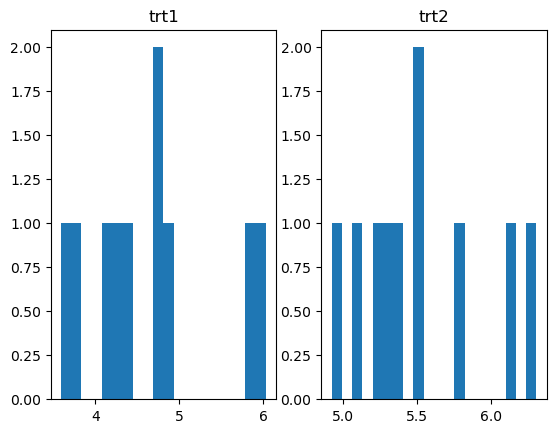

In [11]:
# Plot histograms for both sets of data

fig, ax = plt.subplots(1,2)

# Treatment Group1
ax[0].hist(group_trt1['weight'],bins=20)
ax[0].set_title("trt1")

# Treatment Group2
ax[1].hist(group_trt2['weight'],bins=20)
ax[1].set_title("trt2");

Use Shapiro Wilks test to confirm if the data is normally distributed

In [12]:
# Shapiro Wilks test for normality - trt1
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro

res1 = stats.shapiro(group_trt1["weight"])
res1

ShapiroResult(statistic=0.9304108619689941, pvalue=0.451945960521698)

In [13]:
# Shapiro Wilks test for normality - trt2
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro

res2 = stats.shapiro(group_trt2["weight"])
res2

ShapiroResult(statistic=0.941005289554596, pvalue=0.5642533898353577)

Since both p values are greater than 0.05 so we have no reason to reject the null hypothesis that the data are normally distributed

In [14]:
# Convert the data to dataframe for plotting

data = pd.concat([
    pd.DataFrame({"weight": group_trt1["weight"], "group": "trt1"}),
    pd.DataFrame({"weight": group_trt2["weight"], "group": "trt2"})
])

A strip plot will show us the concentration of the data and visualise the distribution of values. This type of chart is particulrily useful when the sample size is small.

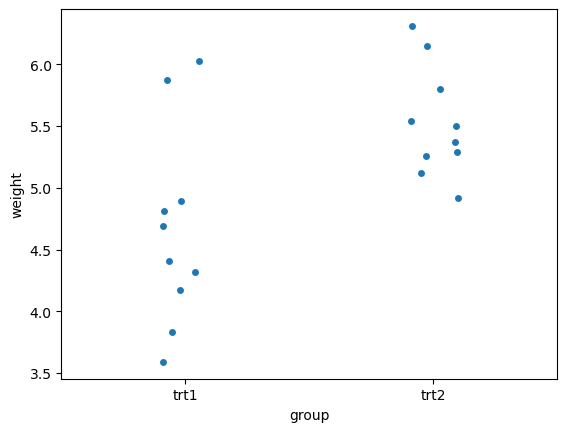

In [15]:
# Plot a stripplot 
# https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn-stripplot

sns.stripplot(data=data, x="group", y="weight");

From the strip plot above we can clearly see that there are different ranges of values in both sets of data.

Assumption 6 - we can test for this using Levene's test for homography of variance to validate if the two sample groups have similar variance.

In [16]:
# Levene Test for Homography of Variance
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html#levene

res = stats.levene(group_trt1["weight"], group_trt2["weight"])
res.statistic

2.104177792800407

With a p value greater than 0.05 we have no reason to reject the null hypothesis that variance is the same across the two groups and can assume that there is homography of variance between the two sets of data.

Perform $t$-test

Given that our data has satisfied the above conditions, we will use the independent samples t test.

In [17]:
# Perform the t test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#ttest-ind

stats.ttest_ind(group_trt1["weight"], group_trt2["weight"])

Ttest_indResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574)

Given that the p value is < 0.5 we can reject the null hypothesis that there is no significant difference between the two groups and accept the alternative hypothesis that the groups are significantly different.

### ANOVA test

ANOVA which stands for Anayysis of Variance, is a test that is generally used to determine if there is a difference between the means of three or more unrelated groups of data. (https://www.qualtrics.com/en-gb/experience-management/research/anova/)   

It works by...    

There are two flovours of ANOVA test:   
- One way ANOVA - used to test for the differences between three or more groups of data with one independent variable
- Two way ANOVA - used to test for the differences between three or more groups of data with two independent variables

Note that an ANOVA test is classed as an OMNIBUS test in that it won't tell us which of the groups are different, only that at least one of the groups is different from one or more of the others. To identify which groups are different, Tukeys HSD (Honestly Significant Different) test can be used to compare all possible pairs of means (https://en.wikipedia.org/wiki/Tukey%27s_range_test).

### Assumptions
The following assumptions should be checked and verified to confirm that the data are suitable for a one way ANOVA test.Taken from laerd.com (https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php)
- The dependent variable should be measured on a continuous scale.
- The independent variable should consist of two or more categorical, independent groups. 
- There should be no relationship between the observations in each group.   
- There should be no significant outliers.   
- The dependent variable should be approximately normally distributed for each group of observations.   
- There needs to be homogeneity of variances - Levene’s test!

We can note that the assumptions are the same as for the t-test performed earlier so there is no reason to test for them all again here, assumption1, 2, 3 are already satisfied from above.

Assumption 4 - using a box plot we can check for the existance any significant outliers in the data

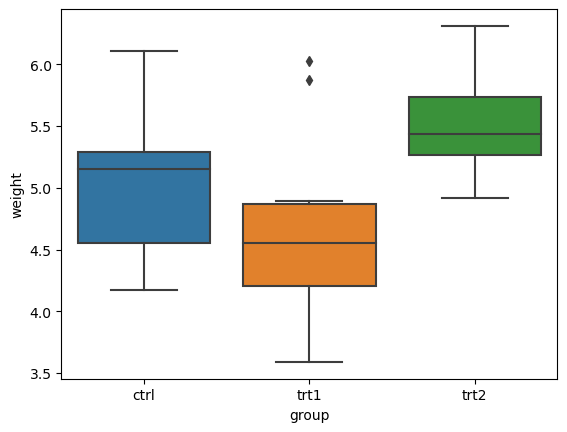

In [26]:
# Plot a boxchart
# https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn-boxplot

# Define the data
data = pd.concat([
    pd.DataFrame({"weight": group_ctrl["weight"], "group": "ctrl"}),
    pd.DataFrame({"weight": group_trt1["weight"], "group": "trt1"}),
    pd.DataFrame({"weight": group_trt2["weight"], "group": "trt2"})
])

# Plot
sns.boxplot(data=data, x="group", y="weight");

Assumption 5 - Using histograms we can validate if the data is normally distributed. Even though our sample size is small the histograms below show that the data pretty much follows a bell curve and has no extreme outliers so we can say it is normally distributed also. 

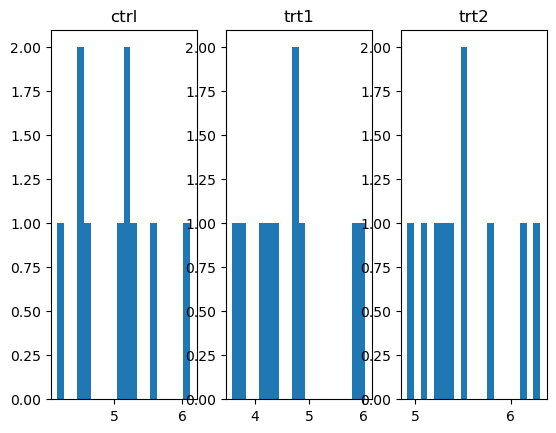

In [18]:
# Plot histograms for the three sets of data

fig, ax = plt.subplots(1,3)
ax[0].hist(group_ctrl['weight'],bins=20)
ax[0].set_title("ctrl")
ax[1].hist(group_trt1['weight'],bins=20)
ax[1].set_title("trt1")
ax[2].hist(group_trt2['weight'],bins=20)
ax[2].set_title("trt2");

Assumption 6 - we can test for this using Levene's test for homography of variance to validate if the three sample groups have similar variance. And as with the t-test above, with a p value greater than 0.05 we have no reason to reject the null hypothesis that variance is the same across the three groups and can assume that there is homography of variance between the three sets of data.

In [19]:
# Levene Test for Homography of Variance
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html#levene

res = stats.levene(group_ctrl["weight"], group_trt1["weight"], group_trt2["weight"])
res.statistic

1.1191856948703909

Perform ANOVA test

In [20]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#f-oneway

f_statistic, p_value = stats.f_oneway(group_ctrl['weight'], group_trt1['weight'], group_trt2['weight'])

f_statistic, p_value

(4.846087862380136, 0.0159099583256229)

Reading the result above we can see a p_value of less than 0.05 so can reject the null hypothesis that there is no significant difference between the groups of data. 

To determine where the differences are we use Tukeys HSD

In [21]:
# Tukeys HSD
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html#tukey-hsd

#res = stats.tukey_hsd(ctrl, trt1, trt2)
res = stats.tukey_hsd(df[df["group"] == "ctrl"]["weight"], df[df["group"] == "trt1"]["weight"], df[df["group"] == "trt2"]["weight"])

print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.371     0.391    -0.320     1.062
 (0 - 2)     -0.494     0.198    -1.185     0.197
 (1 - 0)     -0.371     0.391    -1.062     0.320
 (1 - 2)     -0.865     0.012    -1.556    -0.174
 (2 - 0)      0.494     0.198    -0.197     1.185
 (2 - 1)      0.865     0.012     0.174     1.556



From the results above we can see that only between groups 1 and 2 is the p_value less than 0.05 so we can tell that these two groups are similar but that group 0 contains different data than these.

There are a number of reasons why an ANOVA test is more appropriate than using multiple t-tests on three or more groups of data.    

Firstly, there is the cost element in terms of effort. Only one ANOVA test is required regardless of the number of groups of data. To produce the equivent results using t-tests we would have to run the test multiple times.   
For example:   
- groups of data = 3 (0, 1, 2), ANOVA tests = 1, t-tests = 3 (0 - 1, 1 - 2, 0 - 2).   
- groups of data = 4 (0, 1, 2, 3),  ANOVA tests = 1, t-tests = 6, (0 - 1, 0 - 2, 0 - 3, 1 - 2, 1 - 3, 2 - 3).   
- etc.

Secondly, according to laerd (https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php), each time a t-test is run there is a chance of of type I error (typically alpha = 0.05 or 5%). With two tests the chances of a type I error is ~10% (5% for each test). With three t-tests it is ~15% etc. ANOVA has controls in place so that the type I error remains at 5%.  


## End